In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [53]:
AT = pd.read_csv('AT.csv')
MC = pd.read_csv('MarketCap.csv')
Factor = pd.read_csv('FF3_Factor.csv')
factor = Factor.drop([0,1]).reset_index(drop = True)
factor.columns = factor.iloc[0]
factor = factor[1:]

In [207]:
ME_B = pd.read_csv('ME_Breakpoints.csv')

In [210]:
ME_B

,This file was created by CMPT_ME_BRKPTS using the 202111 CRSP database. It contains every 5th NYSE ME percentile (divided by 1000000).,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,192512,487.0,1.40,2.38,3.37,4.95,5.95,7.40,8.89,10.81,...,18.55,22.88,29.92,38.41,49.93,65.75,92.72,142.48,238.78,1319.00
1,192601,491.0,1.38,2.54,3.76,4.84,5.94,7.47,9.28,10.94,...,17.75,23.45,30.40,39.00,50.85,66.82,94.69,139.18,235.20,1331.71
2,192602,499.0,1.29,2.34,3.57,4.69,5.61,7.15,8.45,10.53,...,17.03,21.18,27.62,36.55,46.49,61.43,87.51,138.04,223.02,1366.39
3,192603,503.0,1.12,2.05,3.08,4.15,5.01,6.01,7.39,9.00,...,15.65,19.04,24.80,31.90,44.40,58.24,81.92,130.12,205.20,1322.46
4,192604,505.0,1.31,2.35,3.32,4.37,5.03,6.63,8.13,9.60,...,15.81,19.17,25.60,33.10,45.00,57.73,83.63,133.50,211.20,1350.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,202109,1216.0,221.90,475.31,701.30,992.95,1402.86,1841.61,2312.83,2808.87,...,5076.26,6182.68,7785.84,10101.12,13874.73,20274.49,28850.64,40394.99,83942.43,618036.44
1150,202110,1220.0,231.09,471.52,695.60,1051.28,1435.56,1864.17,2377.35,2972.37,...,5069.06,6330.01,8197.89,10807.33,14207.99,21380.33,30156.47,42811.12,84917.77,650093.31
1151,202111,1218.0,218.59,454.60,684.48,1005.36,1382.81,1791.00,2288.05,2909.67,...,4894.11,6109.97,7963.77,10712.10,13916.46,20024.08,28491.65,41780.93,83260.27,619122.19
1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def mshow(data):
    plt.imshow(data.isna(), aspect = 'auto')

In [27]:
factor = factor

,NaN,Mkt-RF,SMB,HML,RF
1,192607,2.96,-2.38,-2.73,0.22
2,192608,2.64,-1.47,4.14,0.25
3,192609,0.36,-1.39,0.12,0.23
4,192610,-3.24,-0.13,0.65,0.32
5,192611,2.53,-0.16,-0.38,0.31
...,...,...,...,...,...
1240,2018,-6.93,-3.34,-9.8,1.81
1241,2019,28.28,-6.06,-10.48,2.14
1242,2020,23.67,12.78,-46.31,0.44
1243,NaN,NaN,NaN,NaN,NaN


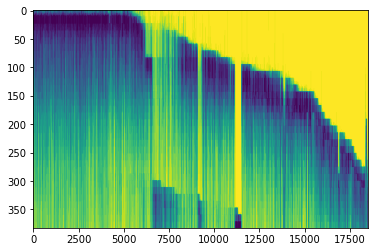

In [8]:
mshow(AT)

In [9]:
AT

,date,001003,001004,001009,001011,001012,001013,001015,001016,001017,...,315887,316056,317260,317264,317427,318728,326688,327451,328032,328795
0,1987-01-31,14.586,NaN,NaN,6.502,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-02-28,14.586,NaN,NaN,6.502,NaN,NaN,NaN,NaN,90.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-03-31,14.586,NaN,NaN,6.502,NaN,NaN,NaN,NaN,90.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1987-04-30,14.586,NaN,NaN,6.502,NaN,NaN,NaN,NaN,90.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1987-05-31,14.586,235.091,NaN,6.502,NaN,NaN,NaN,NaN,90.447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2018-07-31,NaN,1524.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1643.41,2542.0,387.711,1736.11,5532.164,99747.0,4725.0,507.122,266.811,1602.5
379,2018-08-31,NaN,1524.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1643.41,2542.0,387.711,1736.11,5532.164,99747.0,4725.0,507.122,266.811,1602.5
380,2018-09-30,NaN,1524.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1643.41,2542.0,387.711,1736.11,5532.164,99747.0,4725.0,507.122,266.811,1602.5
381,2018-10-31,NaN,1524.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1643.41,2542.0,387.711,1736.11,5532.164,99747.0,4725.0,507.122,266.811,1602.5


In [34]:
MC_rank = MC.rank(axis = 1, ascending = False, pct = True)

In [48]:
MC = MC.set_index(MC['date']).drop('date', axis =1)

In [50]:
MC_rank

,001690_01,012141_01,160329_01,064768_01,184996_01,170617_01,117768_01,002176_01,010903_01,002968_01,...,329579_01,330826_01,331125_01,335466_01,339950_01,343180_01,345189_01,345556_01,347085_01,349972_01
0,0.051945,0.093187,NaN,NaN,NaN,NaN,NaN,0.036805,0.362830,0.063430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.036829,0.068718,NaN,NaN,NaN,NaN,NaN,0.036155,0.399731,0.057714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.028723,0.063964,NaN,NaN,NaN,NaN,NaN,0.032593,0.392952,0.056631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.030333,0.050294,NaN,NaN,NaN,NaN,NaN,0.030724,0.383757,0.057143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.022590,0.044985,NaN,NaN,NaN,NaN,NaN,0.030964,0.466991,0.056865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.000054,0.000107,0.000161,0.000214,0.000321,0.000268,0.000428,0.000375,0.000696,0.000535,...,NaN,NaN,NaN,0.852387,NaN,NaN,NaN,NaN,NaN,NaN
417,0.000053,0.000107,0.000160,0.000213,0.000320,0.000266,0.000426,0.000373,0.000693,0.000480,...,NaN,NaN,NaN,0.851396,NaN,NaN,NaN,NaN,NaN,NaN
418,0.000107,0.000053,0.000160,0.000213,0.000266,0.000320,0.000426,0.000373,0.000586,0.000480,...,NaN,NaN,NaN,0.851138,NaN,NaN,NaN,NaN,NaN,NaN
419,0.000053,0.000107,0.000160,0.000213,0.000266,0.000320,0.000373,0.000426,0.000586,0.000480,...,NaN,NaN,NaN,0.850125,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
MC[MC_rank < 0.5]

,date,001690_01,012141_01,160329_01,064768_01,184996_01,170617_01,117768_01,002176_01,010903_01,...,329579_01,330826_01,331125_01,335466_01,339950_01,343180_01,345189_01,345556_01,347085_01,349972_01
0,NaN,2.541416e+03,1.254210e+03,NaN,NaN,NaN,NaN,NaN,3234.540000,128.832625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3.482681e+03,1.900809e+03,NaN,NaN,NaN,NaN,NaN,3555.700000,107.681000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.392570e+03,1.995038e+03,NaN,NaN,NaN,NaN,NaN,3853.920000,117.295375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.129161e+03,2.529622e+03,NaN,NaN,NaN,NaN,NaN,4037.440000,121.684500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.073427e+03,2.719183e+03,NaN,NaN,NaN,NaN,NaN,3876.860000,77.260000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,NaN,2.513841e+06,2.269836e+06,1.932108e+06,1756219.74,723948.48,1072127.88,558729.60,647006.462474,392542.610000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,NaN,2.324390e+06,2.117219e+06,1.777041e+06,1665515.28,778581.92,947916.27,517071.36,611288.979240,368077.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,NaN,2.460733e+06,2.490466e+06,1.968070e+06,1709822.01,1118456.00,903731.01,639686.34,643271.115258,433762.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,NaN,2.715348e+06,2.482731e+06,1.886334e+06,1778084.49,1149339.04,906216.78,817553.52,619457.266181,418455.240000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 시가총액 기준으로 SMB구분

In [93]:
# 전년도 12월과 당해 6월 데이터를 기준으로 포함 여부 설정
MC_exist_mask = MC.notna()
for i in reversed(range(len(MC)-7)):
    MC_exist_mask.iloc[i+7] = MC_exist_mask.iloc[(i//12)*12] & MC_exist_mask.iloc[(i//12)*12+6]

In [104]:
# small firm / big firm 여부 설정
MC_rank = MC[MC_exist_mask].rank(axis = 1, ascending = False, pct= True)
small_mask = MC_rank < 0.5
for i in reversed(range(len(MC)-7)):
    small_mask.iloc[i+7] = small_mask.iloc[(i//12)*12+6]
big_mask = MC_rank > 0.5
for i in reversed(range(len(MC)-7)):
    big_mask.iloc[i+7] = big_mask.iloc[(i//12)*12+6]

In [105]:
# 개수 잘 일치하는지 대충 확인
print(small_mask.sum(axis = 1))
print(big_mask.sum(axis = 1))

0      1915
1      2226
2      2454
3      2554
4      2567
       ... 
416    9047
417    9047
418    9047
419    9047
420    9047
Length: 421, dtype: int64
0      1916
1      2227
2      2455
3      2555
4      2568
       ... 
416    9048
417    9048
418    9048
419    9048
420    9048
Length: 421, dtype: int64


In [106]:
# Small / Big 포트폴리오별 Monthly 수익률 계산
small = MC[small_mask]
small = small.set_index(MC['date']).drop('date', axis = 1)
r_small = small.pct_change().mean(axis = 1)

big = MC[big_mask]
big = big.set_index(MC['date']).drop('date', axis = 1)
r_big = big.pct_change().mean(axis = 1)

In [114]:
SMB = (r_small - r_big) * 100
SMB = SMB.iloc[7:]

In [125]:
factor_need = factor.iloc[732:732+413]

In [154]:
factor_need

,NaN,Mkt-RF,SMB,HML,RF
733,198707,3.85,-0.66,0.73,0.46
734,198708,3.52,-0.77,-0.95,0.47
735,198709,-2.59,0.56,0.3,0.45
736,198710,-23.24,-8.4,4.23,0.6
737,198711,-7.77,2.75,2.96,0.35
...,...,...,...,...,...
1141,202107,1.27,-3.96,-1.75,0
1142,202108,2.9,-0.48,-0.13,0
1143,202109,-4.37,0.8,5.09,0
1144,202110,6.65,-2.28,-0.44,0


In [254]:
SMB.to_csv('SMB.csv')

# HML 팩터 구성

In [264]:
col_del = list(map(lambda x:x[:-3], MC.columns[1:]))

col_del = ['date'] + col_del

In [269]:
MC_AT = MC
MC_AT.columns = col_del

MC_AT = MC_AT[AT.columns][1:384]

In [292]:
MC_AT = MC_AT.set_index(MC_AT['date']).drop('date', axis =1)

In [293]:
AT = AT.set_index(AT['date']).drop('date', axis =1)

In [295]:
BEME = AT/MC_AT.astype(float)

In [300]:
BEME.replace([np.inf, -np.inf], np.nan, inplace = True)

In [312]:
MC_exist_mask.columns = col_del

In [313]:
MC_exist_mask = MC_exist_mask[AT.columns][1:384]

In [336]:
BE_mask = MC_exist_mask.set_index(BEME.index)

In [338]:
# small firm / big firm 여부 설정
BEME_rank = BEME[BE_mask].rank(axis = 1, ascending = False, pct= True)
low_mask = BEME_rank < 0.5
for i in reversed(range(len(BEME_rank)-7)):
    low_mask.iloc[i+7] = low_mask.iloc[(i//12)*12+6]
high_mask = BEME_rank > 0.5
for i in reversed(range(len(BEME_rank)-7)):
    high_mask.iloc[i+7] = high_mask.iloc[(i//12)*12+6]

In [340]:
low_mask.sum(axis = 1)

date
1987-01-31    1382
1987-02-28    1437
1987-03-31    1619
1987-04-30    1681
1987-05-31    1748
              ... 
2018-07-31    2639
2018-08-31    2582
2018-09-30    2582
2018-10-31    2582
2018-11-30    2582
Length: 383, dtype: int64

In [341]:
high_mask.sum(axis = 1)

date
1987-01-31    1383
1987-02-28    1438
1987-03-31    1620
1987-04-30    1682
1987-05-31    1749
              ... 
2018-07-31    2640
2018-08-31    2583
2018-09-30    2583
2018-10-31    2583
2018-11-30    2583
Length: 383, dtype: int64

In [346]:
# Small / Big 포트폴리오별 Monthly 수익률 계산
low = MC_AT[low_mask]
r_low = low.pct_change().mean(axis = 1)

high = MC_AT[high_mask]
r_high = high.pct_change().mean(axis = 1)

In [352]:
HML = r_high - r_low

In [353]:
HML.to_csv('HML.csv')